In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv',encoding='CP949')

In [3]:
#구강검진 관련 기록만
teeth_df = df[['식전혈당(공복혈당)', '구강검진 수검여부', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상','치석']].copy()
teeth_df.head()

,식전혈당(공복혈당),구강검진 수검여부,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,93.0,1,미시행,미시행,미시행,1.0
1,89.0,0,미시행,미시행,미시행,NaN
2,100.0,0,미시행,미시행,미시행,NaN
3,85.0,0,미시행,미시행,미시행,NaN
4,91.0,0,미시행,미시행,미시행,NaN


In [4]:
teeth_df.isnull().sum()

식전혈당(공복혈당)         5523
구강검진 수검여부             0
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
dtype: int64

In [5]:
teeth_df = teeth_df.dropna()

In [6]:
#치석을 제외하면 전부 미시행
print(teeth_df['구강검진 수검여부'].value_counts())

print(teeth_df['결손치 유무'].value_counts())

print(teeth_df['치아마모증유무'].value_counts())

print(teeth_df['제3대구치(사랑니) 이상'].value_counts())

print(teeth_df['치석'].value_counts())

1    397657
Name: 구강검진 수검여부, dtype: int64
미시행    397657
Name: 결손치 유무, dtype: int64
미시행    397657
Name: 치아마모증유무, dtype: int64
미시행    397657
Name: 제3대구치(사랑니) 이상, dtype: int64
1.0    191920
0.0    184882
2.0     20855
Name: 치석, dtype: int64


In [7]:
teeth_df = teeth_df.drop(['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'], axis=1)
teeth_df = teeth_df[teeth_df['구강검진 수검여부'] != 0]

In [8]:
temp = np.where(teeth_df['식전혈당(공복혈당)'] >= 126, 1, 0)
teeth_df['당뇨여부'] = temp
teeth_df.head()

,식전혈당(공복혈당),구강검진 수검여부,치석,당뇨여부
0,93.0,1,1.0,0
6,90.0,1,0.0,0
7,130.0,1,0.0,1
8,99.0,1,0.0,0
9,98.0,1,0.0,0


In [9]:
diabetes = pd.DataFrame(teeth_df[teeth_df['식전혈당(공복혈당)']>=126]['치석'].value_counts())
not_diabetes = pd.DataFrame(teeth_df[teeth_df['식전혈당(공복혈당)']<126]['치석'].value_counts())

diabetes.plot(kind='bar', title='diabetes')
not_diabetes.plot(kind='bar', title='not diabetes')

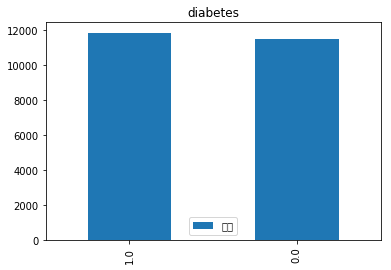

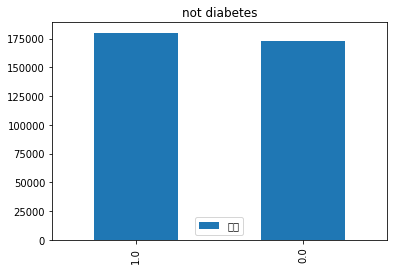

In [10]:
teeth_df = teeth_df[teeth_df['치석'] != 2.0]
diabetes = pd.DataFrame(teeth_df[teeth_df['식전혈당(공복혈당)']>=126]['치석'].value_counts())
not_diabetes = pd.DataFrame(teeth_df[teeth_df['식전혈당(공복혈당)']<126]['치석'].value_counts())

diabetes.plot(kind='bar', title='diabetes')
not_diabetes.plot(kind='bar', title='not diabetes')